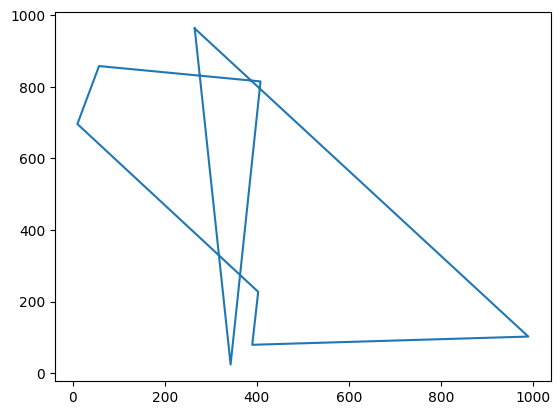

4744.69248044646


In [250]:
import matplotlib.pyplot as plt
def viz(P):
    P.append((P[0][0], P[0][1]))
    x, y = zip(*P)
    
    plt.xlabel = 'x-coordinate'
    plt.ylabel = 'y-coordinate'

    plt.plot(x,y)
    plt.show()
    

def tour_length(P):
    P.append((P[0][0], P[0][1]))
    dist = []
    for i in range(len(P) - 1):
        x1 = P[i][0]
        y1 = P[i][1]
        x2 = P[i+1][0]
        y2 = P[i+1][1]
        
        dist.append((((x2-x1)**2)+((y2-y1)**2))**0.5)

    return sum(dist)
        

K = [(265, 963), (343, 24), (408, 815), (57, 858), (10, 696), (403, 227), (390, 79), (990, 102)]
viz(K)
print(tour_length(K))

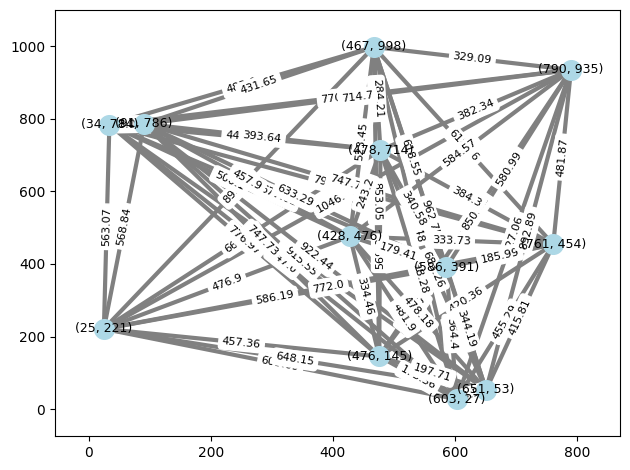

True
[((603, 27), (651, 53)), ((34, 784), (91, 786)), ((476, 145), (603, 27)), ((586, 391), (428, 476)), ((586, 391), (761, 454)), ((478, 714), (428, 476)), ((476, 145), (586, 391)), ((467, 998), (478, 714)), ((467, 998), (790, 935)), ((91, 786), (478, 714)), ((25, 221), (476, 145))]
[(25, 221), (476, 145), (603, 27), (651, 53), (586, 391), (428, 476), (478, 714), (467, 998), (790, 935), (91, 786), (34, 784), (761, 454)]
4407.538624791183


In [251]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import tree

def approx_TSP(P):
    G = nx.Graph()

    for i in range(len(P)):
        for j in range(i+1, len(P)):
            x1 = P[i][0]
            y1 = P[i][1]
            x2 = P[j][0]
            y2 = P[j][1] 
            wt = round((((x2-x1)**2)+((y2-y1)**2))**0.5,2)
            G.add_edge(P[i], P[j], weight=wt)
            
    pos = {node: node for node in G.nodes}
    nx.draw_networkx_nodes(G, pos, node_size=200, node_color='lightblue', hide_ticks= False)
    nx.draw_networkx_edges(G, pos, edgelist=G.edges, width=3, edge_color='grey', hide_ticks= False)
    nx.draw_networkx_labels(G, pos, font_size=9, font_family="sans-serif", hide_ticks= False) 
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8, hide_ticks= False)

    plt.tight_layout()
    plt.show()

    # FindMST
    print(nx.is_connected(G))
    mst = tree.minimum_spanning_edges(G, algorithm="kruskal", data=False)
    edgelist = list(mst)
    print(edgelist)
        
    M = nx.Graph()
    M.add_edges_from(edgelist)
    

    # preorder
    preorder = list(nx.dfs_preorder_nodes(M, source=P[0]))
    print(preorder)

    print(tour_length(preorder))
    

K = [(25, 221), (34, 784), (476, 145), (603, 27), (467, 998), (586, 391), (91,786), (761, 454), (478, 714), (790, 935), (651, 53), (428, 476)]
approx_TSP(K)